# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

Trends--
* Upward , Horizontal/Stationary , Downward
* Seasonality -- Repeating Trends
* Cyclical -- Trends with no set repetition



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

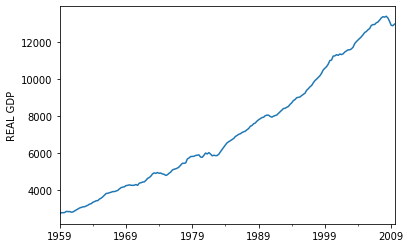

In [6]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');
#Due to recession in 2008, dip is there

### HP filter (Hodrick-Prescott filter)

When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# tsa--time series analysis

In [8]:
# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [9]:
gdp_cycle.head(20)

#We see from these numbers that for the period from 1960-09-30 to 1965-06-30 actual values fall below the trendline.

1959-03-31    39.511915
1959-06-30    80.088532
1959-09-30    48.875455
1959-12-31    30.591933
1960-03-31    64.882667
1960-06-30    23.040242
1960-09-30    -1.355312
1960-12-31   -67.462365
1961-03-31   -81.367438
1961-06-30   -60.167890
1961-09-30   -46.369224
1961-12-31   -20.695339
1962-03-31    -2.162153
1962-06-30    -4.718648
1962-09-30   -13.556457
1962-12-31   -44.369262
1963-03-31   -43.320274
1963-06-30   -44.546971
1963-09-30   -26.298758
1963-12-31   -44.261196
Name: realgdp_cycle, dtype: float64

In [10]:
type(gdp_cycle)

pandas.core.series.Series

In [11]:
df['trend'] = gdp_trend

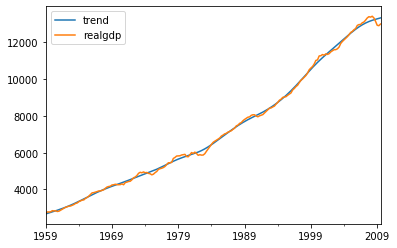

In [12]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

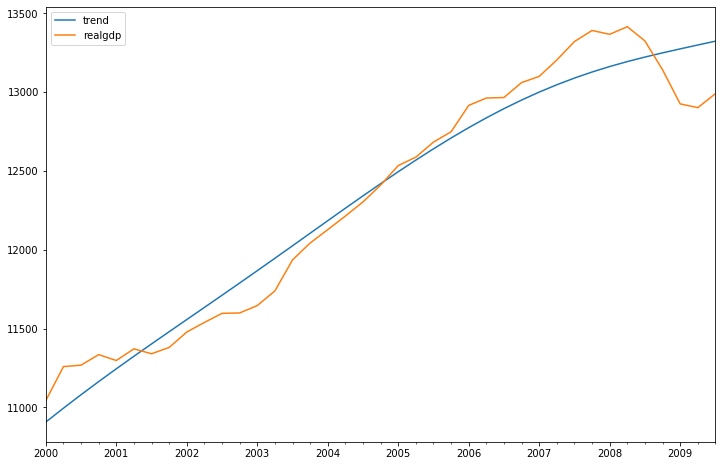

In [13]:
#Displaying two columns and the data starts from 2000 till end

df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# ETS Models (Error-Trend-Seasonality)

ETS models contains wide variety of different models:-
* Exponential Smoothing (EWMA--Exponentially weighted moving average)
* Trend method Models
* ETS Decomposition

As we begin working with endogenous data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. 

These fall under the category of state space models, and include decomposition (described below), and exponential smoothing (described in an upcoming section).

The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS).

We've already seen a simplistic example of this in the Introduction to Statsmodels section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.


## Seasonal Decomposition
Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).

A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.
airline=pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [16]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
# Missing values
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

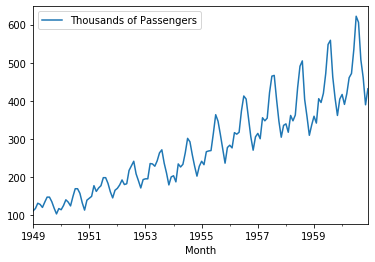

In [18]:
airline.plot();

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a bit hard to tell from this one plot).

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works

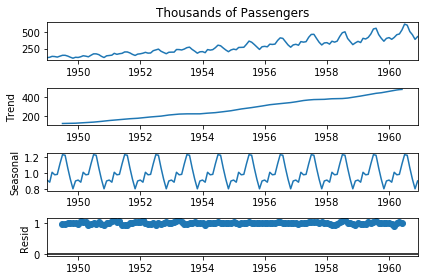

In [21]:
result.plot();
#observed,trend,seasonal,resid

#Residual is the error of the data in trend and seasonal

# Moving Average

compare Simple Moving Averages to Exponentially Weighted Moving Averages in terms of complexity and performance.

## Simple Moving Average

SMA has some weakness:-

* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

**SMA uses rolling() method**

In [22]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [23]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


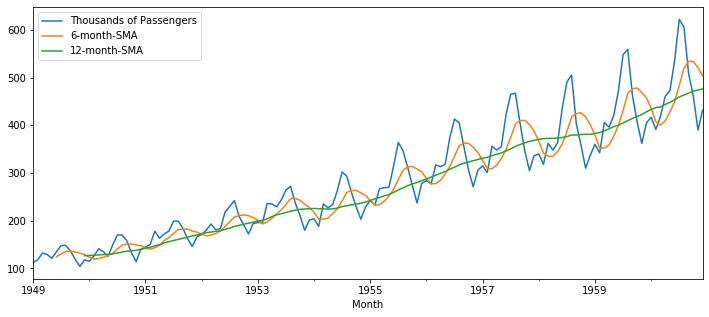

In [24]:
airline.plot(figsize=(12,5));

## Exponentially Weighted Moving Average

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

**EWMA uses ewm() method**

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

In [25]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

#Span for the time period, here 12 months or 1 year

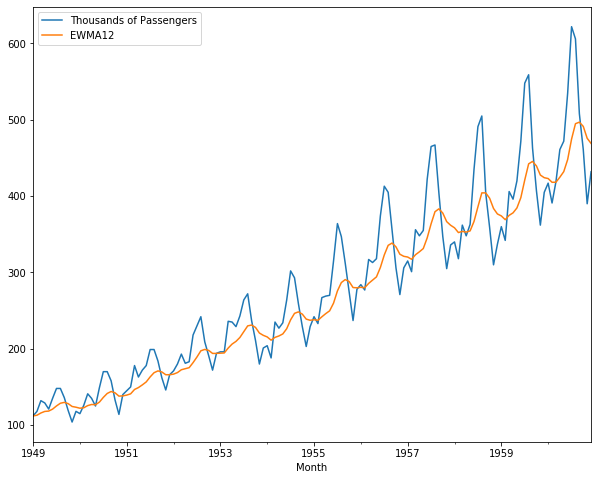

In [26]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(10,8));

Seasonality trend is lot more clear at the end points vs the beginning ones. It is because we weighted the points closer to the present time heavier than the historical value/older values

## Comparing SMA to EWMA

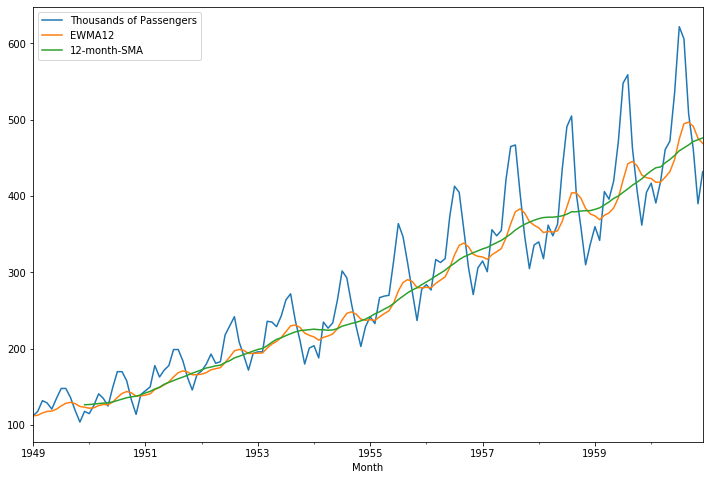

In [27]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Holt-Winters Methods

Above we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

But now,

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

In [29]:
df=pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [30]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [32]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## Simple Exponential Smoothing
A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas .ewm() method

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [35]:
span = 12
alpha = 2/(span+1) #when the span value is greater than 1, we use this formula

In [38]:
# ewm method
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

**Creating a model and fitting the values** (Later on in forecasting prediction for timestamp is there)

In [70]:
#same thing using statsmodels (simple exp smoothing) 
#performing same thing as we did for exponential moving average

model=SimpleExpSmoothing(df['Thousands of Passengers'])

In [43]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [45]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

#For some reason, when optimized=False is passed into .fit(), 
#the statsmodels SimpleExpSmoothing function shifts fitted values down one row. 
#We fix this by adding .shift(-1) after .fittedvalues

In [46]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


## Double Exponential Smoothing
We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment.

If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
#all code in one line. but meaning same as above
df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [52]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237772
1949-02-01,118,112.923077,112.923077,120.237772
1949-03-01,132,115.857988,115.857988,134.237772
1949-04-01,129,117.879836,117.879836,131.237772
1949-05-01,121,118.359861,118.359861,123.237772


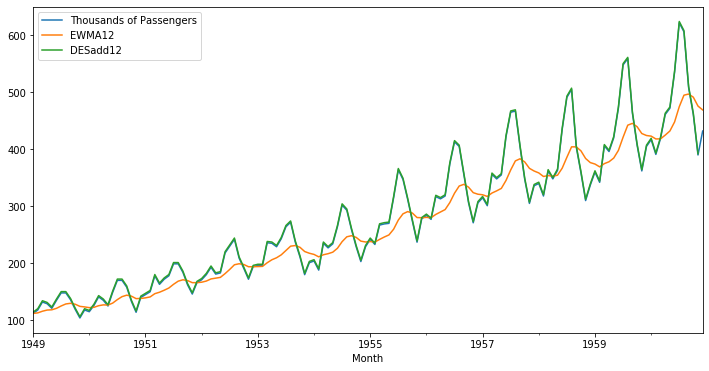

In [54]:
df[['Thousands of Passengers','EWMA12','DESadd12']].plot(figsize=(12,6))

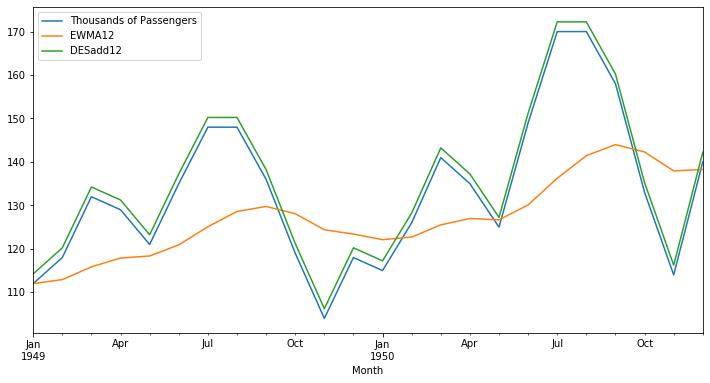

In [53]:
#Zooming at a specific location (first 2 years or 24 months)
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

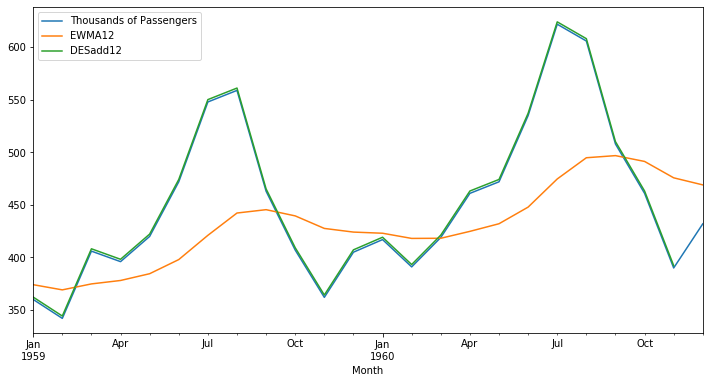

In [57]:
#Zooming at a specific location (last 2 years or 24 months) (fitting properly)
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps (Above is the addition)

In [58]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [59]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247
1949-02-01,118,112.923077,112.923077,120.237772,118.051885
1949-03-01,132,115.857988,115.857988,134.237772,132.058041
1949-04-01,129,117.879836,117.879836,131.237772,129.056722
1949-05-01,121,118.359861,118.359861,123.237772,121.053204


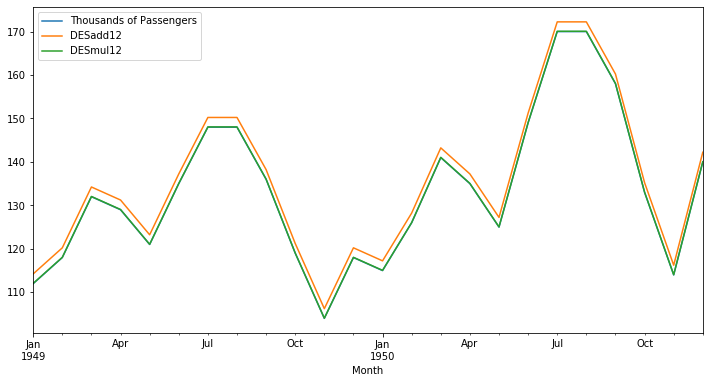

In [60]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

---
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 


For the triple just the seasonal and seasonal periods are added in respect to Double Exponential<br>
Also we do not need to worry about the shift

In [61]:
# Addition trend
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [62]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247,113.081288
1949-02-01,118,112.923077,112.923077,120.237772,118.051885,120.550753
1949-03-01,132,115.857988,115.857988,134.237772,132.058041,135.527339
1949-04-01,129,117.879836,117.879836,131.237772,129.056722,133.155076
1949-05-01,121,118.359861,118.359861,123.237772,121.053204,125.656129


In [64]:
# Multiplication trend
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [65]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247,113.081288,111.608110
1949-02-01,118,112.923077,112.923077,120.237772,118.051885,120.550753,118.853687
1949-03-01,132,115.857988,115.857988,134.237772,132.058041,135.527339,133.343675
1949-04-01,129,117.879836,117.879836,131.237772,129.056722,133.155076,127.912641
1949-05-01,121,118.359861,118.359861,123.237772,121.053204,125.656129,120.991626


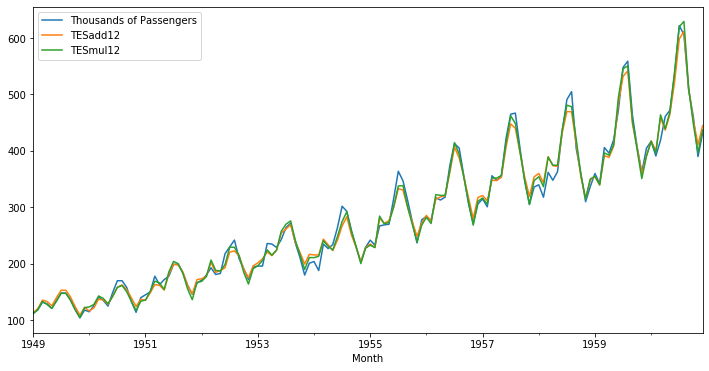

In [66]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

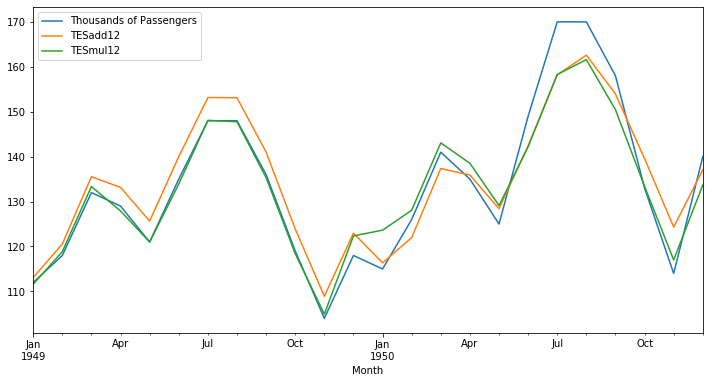

In [67]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

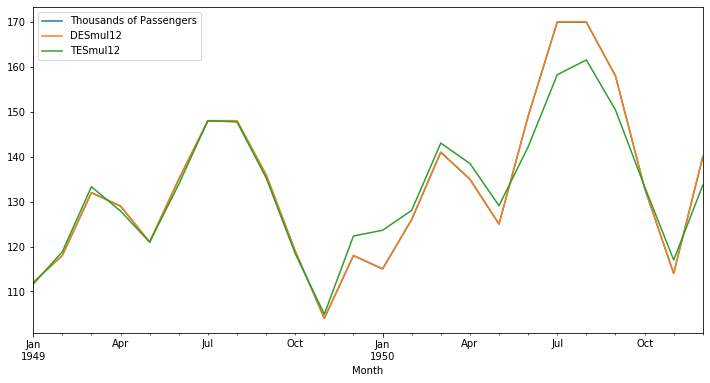

In [68]:
df[['Thousands of Passengers','DESmul12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, we might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing.The key here is to consider what comes next - forecasting. 

The double exponential smoothing performs in the first years but the triple exponential smoothing performs better in the last years useful for forecasting

We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

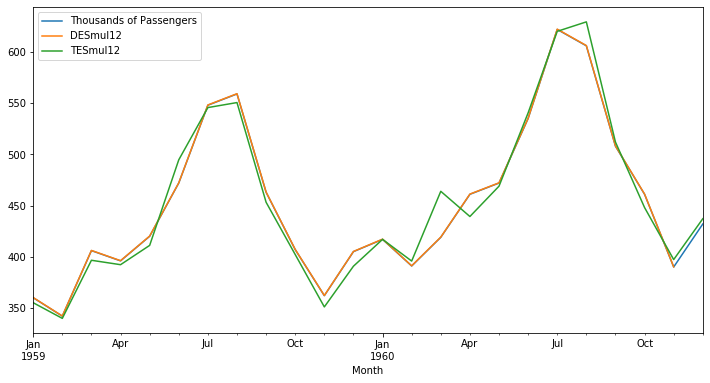

In [69]:
df[['Thousands of Passengers','DESmul12','TESmul12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Later on in forecasting we will give the year and then predict the values<br>
Just remember:-<br>
    
model=SimpleExpSmoothing(df['Thousands of Passengers'])<br>
fitted_model=model.fit(smoothing_level=alpha,optimized=False)<br>
df['SES12']=fitted_model.fittedvalues.shift(-1)<br>